In [201]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [202]:
def F(x):
    return (1 / 8) * np.cos(x - 8)

In [203]:
x0, xn, n = -8, 8, 20  
h = (xn - x0) / n
x_values = np.linspace(x0, xn, n+1)
y_values = F(x_values)

data = pd.DataFrame({'x': x_values, 'F(x)': y_values})
print("\nTabulated values:")
print(data.head())
print(data.tail())
with open("tabulation.txt", "w") as file:
    file.write(data.to_string(index=False))


Tabulated values:
     x      F(x)
0 -8.0 -0.119707
1 -7.2 -0.109217
2 -6.4 -0.032477
3 -5.6  0.063963
4 -4.8  0.121604
      x      F(x)
16  4.8 -0.124787
17  5.6 -0.092174
18  6.4 -0.003650
19  7.2  0.087088
20  8.0  0.125000


In [204]:
def factorial(k):
    if k < 0:
        print("Число повинн о бути не менше 0!")
        return  
    result = 1
    for i in range(2, k + 1):
        result *= i
    return result

print(factorial(3))  



6


In [205]:
def combination(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))
print(combination(5,4))


5


In [206]:
def permutations(n, k):
    if k > n:
        return 0
    return factorial(n) // (factorial(k) * factorial(n - k))
print(permutations(3,3))



1


In [207]:
def step(n):
    return -1 if n % 2 else 1

In [208]:
def finite_d(k, y_values):
    suma = 0
    for j in range(k + 1):
        suma += y_values[j] * step(k - j) * combination(k, j)
    return suma

print(finite_d(1, y_values))
0.010490312164038063

0.010490312164038063


0.010490312164038063

In [209]:
def factorial_p(t, k):
    mn = 1
    for i in range(k):
        mn *= (t - i)
    return mn
print(factorial_p(5, 3))
60

60


60

In [210]:
def approximate_f(n, t, y_values):
    suma = 0
    for k in range(n + 1):
        suma += finite_d(k, y_values) * factorial_p(t, k) / factorial(k)
    return suma
t_values = np.arange(0, n + 0.-1, 0.01 )


print(approximate_f(n, t_values, y_values))


[-0.11970744 -0.11999177 -0.12026841 ...  0.08491135  0.08564251
  0.08636819]


In [211]:
approx_value = approximate_f(n, 1, y_values)
approx = [approximate_f(n, t, y_values) for t in t_values]
print('approx_value.txt', approx_value)
print('approx',approx)

approx_value.txt -0.10921712287638502
approx [np.float64(-0.11970743504042308), np.float64(-0.11999177090849726), np.float64(-0.12026840857976391), np.float64(-0.12053733123654853), np.float64(-0.12079852252195573), np.float64(-0.12105196654194217), np.float64(-0.12129764786733216), np.float64(-0.12153555153577655), np.float64(-0.12176566305365585), np.float64(-0.12198796839792786), np.float64(-0.12220245401791967), np.float64(-0.12240910683706568), np.float64(-0.12260791425459097), np.float64(-0.12279886414714138), np.float64(-0.12298194487036), np.float64(-0.1231571452604113), np.float64(-0.12332445463545214), np.float64(-0.12348386279705185), np.float64(-0.12363536003156007), np.float64(-0.12377893711142354), np.float64(-0.12391458529645263), np.float64(-0.12404229633503686), np.float64(-0.12416206246531142), np.float64(-0.12427387641627322), np.float64(-0.12437773140884839), np.float64(-0.1244736211569108), np.float64(-0.12456153986825198), np.float64(-0.12464148224550353), np.floa

In [212]:
errors = np.abs(true_values - approx)
print(errors)

[0.00000000e+00 2.66239859e-07 5.13698253e-07 ... 4.38452556e-08
 3.00455408e-08 1.54855794e-08]


[-8.    -7.992 -7.984 ...  7.176  7.184  7.192]
t=0.00 | F=-0.119707 | F_approx=-0.119707 | error=0.00e+00
t=0.01 | F=-0.119992 | F_approx=-0.119992 | error=2.66e-07
t=0.02 | F=-0.120268 | F_approx=-0.120268 | error=5.14e-07
t=0.03 | F=-0.120537 | F_approx=-0.120537 | error=7.43e-07
t=0.04 | F=-0.120798 | F_approx=-0.120799 | error=9.56e-07
t=0.05 | F=-0.121051 | F_approx=-0.121052 | error=1.15e-06
t=0.06 | F=-0.121296 | F_approx=-0.121298 | error=1.33e-06
t=0.07 | F=-0.121534 | F_approx=-0.121536 | error=1.50e-06
t=0.08 | F=-0.121764 | F_approx=-0.121766 | error=1.65e-06
t=0.09 | F=-0.121986 | F_approx=-0.121988 | error=1.79e-06
t=0.10 | F=-0.122201 | F_approx=-0.122202 | error=1.92e-06
t=0.11 | F=-0.122407 | F_approx=-0.122409 | error=2.03e-06
t=0.12 | F=-0.122606 | F_approx=-0.122608 | error=2.13e-06
t=0.13 | F=-0.122797 | F_approx=-0.122799 | error=2.22e-06
t=0.14 | F=-0.122980 | F_approx=-0.122982 | error=2.31e-06
t=0.15 | F=-0.123155 | F_approx=-0.123157 | error=2.38e-06
t=0.16 |

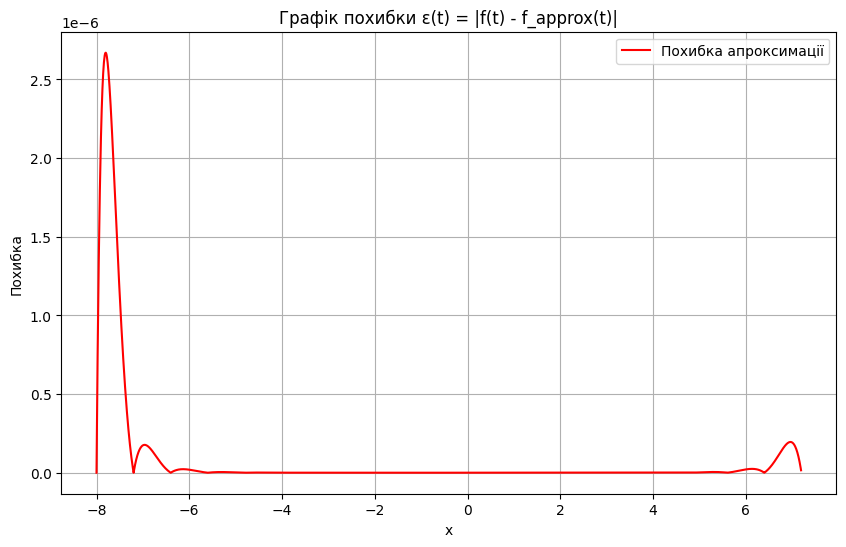

In [213]:
x_eval = x0 + t_values * h
print(x_eval)
true_values = F(x_eval)

# Похибка
errors = np.abs(true_values - approx)

# Вивід
for t, f_t, f_appr, err in zip(t_values, true_values, approx, errors):
    print(f"t={t:.2f} | F={f_t:.6f} | F_approx={f_appr:.6f} | error={err:.2e}")

# Збереження похибок у файл
df_errors = pd.DataFrame({'t': t_values, 'x': x_eval, 'F(x)': true_values, 'F_approx': approx, 'Error': errors})
df_errors.to_csv("approximation_errors.txt", index=False, sep='\t')

# Побудова графіка похибки
plt.figure(figsize=(10, 6))
plt.plot(x_eval, errors, label='Похибка апроксимації', color='red')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Графік похибки ε(t) = |f(t) - f_approx(t)|')
plt.grid(True)
plt.legend()
plt.savefig("error_plot.png")
plt.show()